<a href="https://colab.research.google.com/github/thefinancetutor/python-tutorial-colab/blob/main/Lecture_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Python

**Basic Algebra**


Let's see how algebra works in Python

In [1]:
2+3

5

In [2]:
2*3

6

In [3]:
6*3+5

23

In [4]:
6*(3+5)

48

To exponentiate, use ** together

In [5]:
2**3

8

**Defining Variables**

In [6]:
a=3.0
b=6.0
c=a*b
c*a

54.0

**Defining Functions**

In [7]:
def f(x):
  return x**2

In [8]:
f(3)

9

In [9]:
f(4.66667)

21.777808888899997

**Discounting Cash Flows**

Let's build a function that discounts single cash flows: $$ PV = \frac{FV}{(1 + r)^t} $$

In [10]:
def pv_cf(fv,r,t):
  return fv/(1+r)**t

In [11]:
pv_cf(100,.05,2)

90.70294784580499

Annuities

$$ PV = \frac{C}{(1 + r)} + \frac{C}{(1 + r)^2} + \frac{C}{(1 + r)^3} + \frac{C}{(1 + r)^4} ... + \frac{C}{(1 + r)^N} $$ 

In [12]:
def pv_annuity(c,r,n):
  pv=0
  t=1
  while t<n+1:
    pv=pv+c/(1+r)**t
    t=t+1
  return pv

In [13]:
pv_annuity(100,0.05,10)

772.1734929184811

In [14]:
def pv_annuity(c, r, n):
  pv = 0
  t = 1
  while t < n + 1:
    pv = pv + c / (1 + r)**t
    t = t + 1
  return pv

In [15]:
pv_annuity(100, 0.05, 10)

772.1734929184811


Perpetuities
$$ PV = \frac{C}{(1 + r)} + \frac{C}{(1 + r)^2} + \frac{C}{(1 + r)^3} + \frac{C}{(1 + r)^4} ... = \frac{C}{r} $$

We can use the annuity formula to approximate the present value of a perpetuity by choosing $N$ large enough.


In [16]:
pv_annuity(100, 0.05, 10000)

1999.999999999994

And here is the closed-form solution using $$\frac{C}{r} $$

In [17]:
100/.05

2000.0

**NumPy and PyPlot**

These are two important libraries that come up frequently. NumPy is a numerical library and PyPlot is a graphical plotting library. If you want to use them you need to add them in first.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
a = np.arange(0.0, 2.1, 0.05)
a

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05])

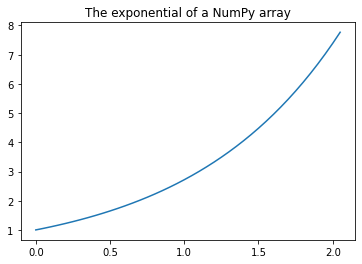

In [21]:
plt.plot(a, np.exp(a))
plt.title('The exponential of a NumPy array')
plt.show()

**Bond Pricing**

Let's combine everything we learned and write a function to price a bond 
$$ PV = \frac{C}{(1 + r)} + \frac{C}{(1 + r)^2} + \frac{C}{(1 + r)^3} + \frac{C}{(1 + r)^4} ... + \frac{C}{(1 + r)^N} + \frac{F}{(1 + r)^N} $$ 

In [22]:
def pv_bond(pmt, r, n, fv):
  pv = 0
  t = 1
  while t < n + 1:
    pv = pv + pmt / (1 + r)**t
    t = t + 1
  pv = pv + fv / (1 + r)**n
  return np.round(pv, 2)



In [23]:
pv_bond(50, 0.05, 30, 1000)

1000.0

In [24]:
r = np.arange(0.0, 0.205, 0.005)
r

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  ])

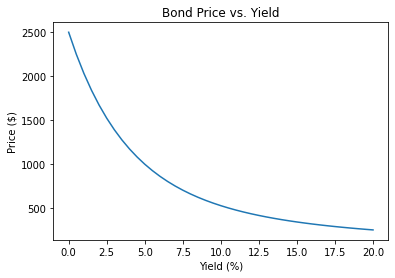

In [25]:
plt.plot(100*r, pv_bond(50, r, 30, 1000))
plt.title('Bond Price vs. Yield')
plt.xlabel('Yield (%)')
plt.ylabel('Price ($)')
plt.show()

**Options**

Let's learn more about Python functions by using them to model derivative prices which are functions of underlying asset prices